In [8]:
import ROOT
from ROOT import TFile, TTree, TH1F, TCanvas, TAxis, TLegend, THStack
import copy
import math
ROOT.gStyle.SetOptStat(0)
ROOT.disableJSVis()

In [9]:
def getRangeY(hist):
    global y_upper
    max_entry = hist.GetMaximum()
    if max_entry > y_upper:
        y_upper = max_entry * 1.1
def setHistOpt(hist, lcolor, lstyle):
    hist.SetLineWidth(2)
    hist.SetLineColor(lcolor)
    hist.SetLineStyle(lstyle)
def plot(h_plot, canvas, leg, xtitle, dopt, hlabel):
    global y_upper
    h_plot.Draw(dopt)
    h_plot.GetXaxis().SetTitle(xtitle)
    h_plot.GetXaxis().SetTitleOffset(1.2)
    h_plot.GetYaxis().SetTitle("Events")
    h_plot.SetMinimum(0.1)
    h_plot.SetMaximum(y_upper)
    leg.AddEntry(h_plot,hlabel)

In [10]:
def get_weight(sample):
    lumi = 41.53*1000
    weight_xsec = {
        'QCD_Pt_300to470': lumi*6830/111229780,
        'QCD_Pt_470to600': lumi*552.1/27881028,
        'QCD_Pt_600to800': lumi*156.5/12807188,
        'QCD_Pt_800to1000': lumi*26.28/1906000,
        'QCD_Pt_1000to1400': lumi*7.47/1517308,
        'QCD_Pt_1400to1800': lumi*0.6484/776000,
        'QCD_Pt_1800to2400': lumi*0.08743/856734,
        'QCD_Pt_2400to3200': lumi*0.005236/1485988,
        'QCD_Pt_3200toInf': lumi*0.0001357/757837,
    }
    return weight_xsec[sample]

In [11]:
variable2use = {}
variable2use["m_jj"] = {"title": "m_{jj} [GeV]", "binning": 100, "lb": 0, "hb": 12000}
# variable2use["dijet_eta"] = {"title": "#eta_{jj}", "binning": 100, "lb": -3, "hb": 3}
# variable2use["dR_jj"] = {"title": "#Delta R_{jj}", "binning": 100, "lb": 0, "hb": 6}
# variable2use["dEta_jj"] = {"title": "#Delta #eta_{jj}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["dPhi_jj"] = {"title": "#Delta #phi_{jj}", "binning": 100, "lb": 0, "hb": 3.2}
# variable2use["dR_j0j2"] = {"title": "#Delta R_{j0j2}", "binning": 100, "lb": 0, "hb": 6}
# variable2use["dEta_j0j2"] = {"title": "#Delta #eta_{j0j2}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["dPhi_j0j2"] = {"title": "#Delta #phi_{j0j2}", "binning": 100, "lb": 0, "hb": 3.2}
# variable2use["dR_j1j2"] = {"title": "#Delta R_{j1j2}", "binning": 100, "lb": 0, "hb": 6}
# variable2use["dEta_j1j2"] = {"title": "#Delta #eta_{j1j2}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["dPhi_j1j2"] = {"title": "#Delta #phi_{j1j2}", "binning": 100, "lb": 0, "hb": 3.2}
# variable2use["jet_eta_0"] = {"title": "#eta_{j0}", "binning": 100, "lb": -3, "hb": 3}
# variable2use["jet_eta_1"] = {"title": "#eta_{j1}", "binning": 100, "lb": -3, "hb": 3}
# variable2use["jet_eta_2"] = {"title": "#eta_{j2}", "binning": 100, "lb": -3, "hb": 3}
# variable2use["jet_ptoverm_0"] = {"title": "p^{j0}_{T}/m_{jj}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["jet_ptoverm_1"] = {"title": "p^{j1}_{T}/m_{jj}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["jet_ptoverm_2"] = {"title": "p^{j2}_{T}/m_{jj}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["dR_jj_j"] = {"title": "#Delta R_{jj-j}", "binning": 100, "lb": 0, "hb": 6}
# variable2use["dEta_jj_j"] = {"title": "#Delta #eta_{jj-j}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["dPhi_jj_j"] = {"title": "#Delta #phi_{jj-j}", "binning": 100, "lb": 0, "hb": 3.2}
# variable2use["jet_ptoverM_0"] = {"title": "p^{j0}_{T}/M_{jjj}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["jet_ptoverM_1"] = {"title": "p^{j1}_{T}/M_{jjj}", "binning": 100, "lb": 0, "hb": 3}
# variable2use["jet_ptoverM_2"] = {"title": "p^{j2}_{T}/M_{jjj}", "binning": 100, "lb": 0, "hb": 1}
# variable2use["dijet_ptoverM"] = {"title": "p^{jj}_{T}/M_{jjj}", "binning": 100, "lb": 0, "hb": 1}
variable2use["M_jjj"] = {"title": "M_{jjj}", "binning": 100, "lb": 0, "hb": 15000}

hist_dic = {}
sample_list = ["QCD_Pt_300to470", "QCD_Pt_470to600","QCD_Pt_600to800","QCD_Pt_800to1000","QCD_Pt_1000to1400","QCD_Pt_1400to1800", "QCD_Pt_1800to2400",
               "QCD_Pt_2400to3200","QCD_Pt_3200toInf"]
sample_list.reverse()

file_list = []
for i, sample in enumerate(sample_list):
    weight = get_weight(sample)
    print(weight)
    file = TFile.Open(f"/home/xyan13/Trijet/TrijetAna/TrijetAna/ML_study_v2/training_3TeV_0p03/BDT_weighted_matching_01_23/{sample}_BDT_Weighting.root")
    file_list.append(file)
    tree = file.Get("Events")
    hist_dic[sample] = {}
    for var, title in variable2use.items():
        hist_dic[sample][var] = TH1F(f"{sample}_{var}", title["title"], title["binning"], title["lb"], title["hb"])
        print(f"Processing: {sample}, {var}")
        for ievt in range(tree.GetEntries()):
            tree.GetEntry(ievt)
            hist_dic[sample][var].Fill(getattr(tree, var),weight*tree.weight_BDT)
        print(hist_dic[sample][var].GetEntries(), hist_dic[sample][var].GetMean())
        setHistOpt(hist_dic[sample][var], i+1, 1)

hist_stack = {}
for var in variable2use.keys():
    hist_stack[var] = THStack(var,var)
    for sample in sample_list:
         hist_stack[var].Add(hist_dic[sample][var])

7.436455332743056e-06
Processing: QCD_Pt_3200toInf, m_jj
1103238.0 1957.3604026959686
Processing: QCD_Pt_3200toInf, M_jjj
1103238.0 7221.168505785984
0.0001463343445572912
Processing: QCD_Pt_2400to3200, m_jj
2244453.0 1665.9834004537208
Processing: QCD_Pt_2400to3200, M_jjj
2244453.0 5706.149969431996
0.004238150814605233
Processing: QCD_Pt_1800to2400, m_jj
1340877.0 1419.835683423468
Processing: QCD_Pt_1800to2400, M_jjj
1340877.0 4517.48408117644
0.034701097938144326
Processing: QCD_Pt_1400to1800, m_jj
1234140.0 1222.0155822287861
Processing: QCD_Pt_1400to1800, M_jjj
1234140.0 3664.772071447041
0.2044602018838627
Processing: QCD_Pt_1000to1400, m_jj
2369250.0 1004.5206372173568
Processing: QCD_Pt_1000to1400, M_jjj
2369250.0 2834.937497587761
0.5726172088142708
Processing: QCD_Pt_800to1000, m_jj
2863974.0 856.2535469082615
Processing: QCD_Pt_800to1000, M_jjj
2863974.0 2318.9699936710167
0.5074841565533356
Processing: QCD_Pt_600to800, m_jj
17687280.0 719.8952109648225
Processing: QCD_Pt_6

m_jj
M_jjj


Warning in <TCanvas::Constructor>: Deleting canvas with same name: m_jj
Warning in <TCanvas::Constructor>: Deleting canvas with same name: M_jjj
Info in <TCanvas::Print>: png file m_jj.png has been created
Info in <TCanvas::Print>: png file M_jjj.png has been created


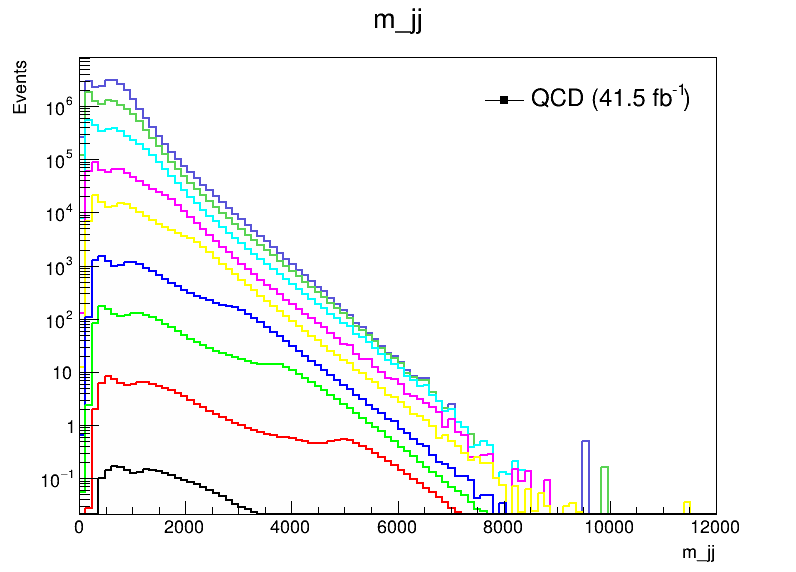

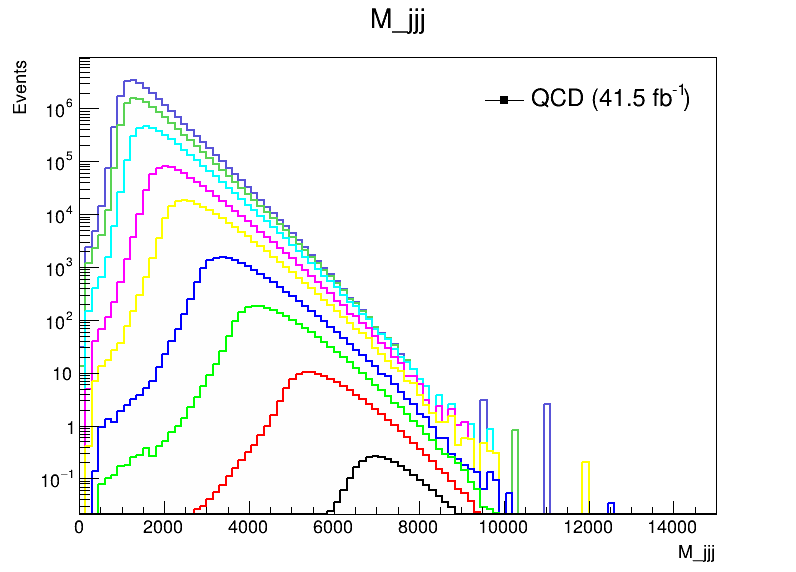

In [12]:
nvar = len(hist_dic.keys())
nrow = math.ceil(nvar/3)
plot_list = []
leg_list = []
plot_name_list = []
for variable, hist in hist_stack.items():
    y_upper = 0
    getRangeY(hist)
    c = TCanvas(variable,"",800,600)
    leg = TLegend(0.6,0.8,0.87,0.85)
    leg.SetBorderSize(0)
    title = hist.GetTitle()
    print(title)
    plot(h_plot=hist, canvas=c, leg=leg, xtitle=title, dopt="HIST", hlabel="QCD (41.5 fb^{-1})")
    plot_list.append(c)
    leg_list.append(leg)
    plot_name_list.append(hist.GetName())
for i in range(0,len(plot_list)):
    plot_list[i].cd()
    plot_list[i].SetLogy()
    leg_list[i].Draw()
    plot_list[i].Draw()
    plot_list[i].Print(f"{plot_name_list[i]}.png")